## Anomalias magnéticas produzidas por fontes crustais com geometria simples:

> #### Neste exercicio vamos calcular as componentes cartesianas do campo de Indução magnética produzida por 1 prisma vertical, cujas coordenadas dos vértices e a magnetização são totalmente conhecidas. Há ainda a consideração sobre a massa dessa fonte para que façamos o uso da relação de Poisson a fim de comparar o resultado obtido com o calculo analítico das referidas componentes. <br>
> #### Vamos simular um campo de Indução Regional e por fim obter a Anomalia de Campo Total produzida pelo prisma, que em aplicações práticas pode ser aludido a um modelo de dique vertical, ou até mesmo uma soleira. <br>
> #### Você vai perceber que os cálculos começam a ficar mais desafiadores do que para o caso da bolinha, e por este motivo, utilizar a Relação de Poisson pode ser uma ótima alternativa, uma vez que tratam-se de equações para as componentes cartesianas um pouco mais simples do que as equações envolvendo vetores e suas componentes.

In [1]:
# Import das Bibliotecas:
import numpy
import sys
import matplotlib.pyplot as plt
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!

In [2]:
import prism, noise, plot_3D, auxiliars

### Etapa 1: Definicão das coordenadas de Observação:

In [3]:
nx = 100 # n de observacoes na direcao x
ny = 100 # n de observacoes na direcao y
size = (nx, ny)

xmin = -5000.0 # metros
xmax = +5000.0 # metros
ymin = -5000.0 # metros
ymax = +5000.0 # metros
z    = -100.0  # altura de voo, em metros

x = numpy.linspace(xmin, xmax, nx, endpoint=True)
y = numpy.linspace(ymin, ymax, ny, endpoint=True)
delt = x[1] - x[0]
print(delt)
# fazendo o Mesh para gridar a regiao:
X,Y = numpy.meshgrid(x,y)
print(type(X))

101.0101010101007
<class 'numpy.ndarray'>


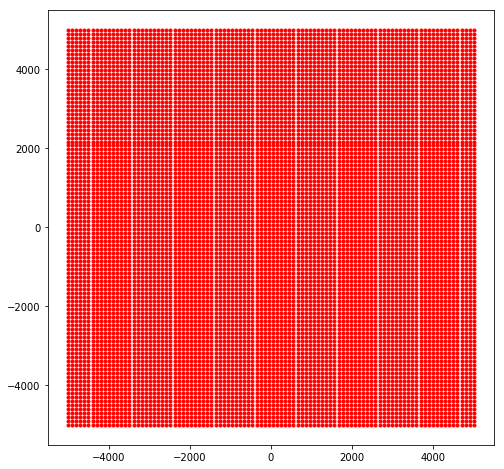

In [4]:
plt.figure(figsize=(8,8))
plt.plot(X,Y, '.r')
plt.show()

## Etapa 2: Simulação do campo Principal na região das observações:

In [5]:
I = -30.0    # inclinacao do campo principal em graus
D = -23.0      # declinacao do campo principal em graus
Fi = 40000.0 # Intensidade do campo principal (nT)

# Campo principal variando com as posicao F(X,Y):
F = Fi + 0.013*X + 0.08*Y # nT

In [6]:
# Calculo das componentes cartesianas do versor F:

# conversao de graus para radiandos:
incl = numpy.deg2rad(I)
decl = numpy.deg2rad(D)
#-----------------------------------
Fx = numpy.cos(incl)*numpy.cos(decl)
Fy = numpy.cos(incl)*numpy.sin(decl)
Fz = numpy.sin(incl)

In [7]:
Fx,Fy,Fz

(0.7971805873966853, -0.3383830833210727, -0.49999999999999994)

## Etapa 3: Definição das propriedades da fonte crustal (prisma vertical):


In [8]:
# coordenadas dos vertices (corners) do prisma, em metros:
x1,x2  = (-500.0, 500.0) 
y1,y2  = (-500.0, 500.0)
z1,z2  = (2000.0,2500.0)   # z eh positivo para baixo!

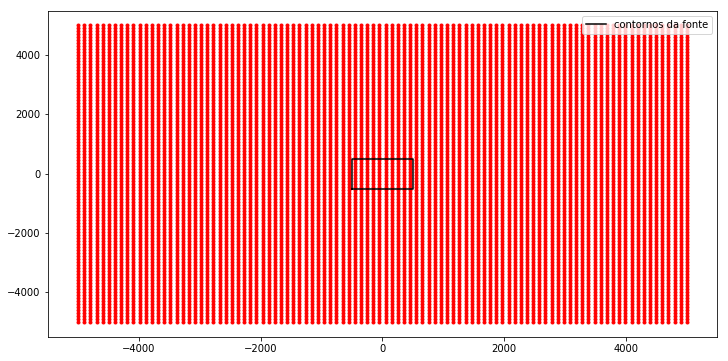

In [9]:
plt.figure(figsize=(12,6))
plt.plot(X,Y, '.r')
xs = [x1, x1, x2, x2, x1]
ys = [y1, y2, y2, y1, y1]
plt.plot(xs,ys,'k-', label='contornos da fonte')
plt.legend()
plt.show()

In [10]:
# Propriedades magneticas da fonte crustal:
inc = I # magnetizacao puramente induzida
dec = -10.0 
Mi  = 10.0 # intensidade da magnetizacao em A/m

# conversao de graus para radianos:
inc_rad = numpy.deg2rad(inc)
dec_rad = numpy.deg2rad(dec)

# versor magnetizacao da fonte crustal modelada:
mx = numpy.cos(inc_rad)*numpy.cos(dec_rad)
my = numpy.cos(inc_rad)*numpy.sin(dec_rad)
mz = numpy.sin(inc_rad)

In [11]:
# componentes cartesianas do versor magnetizacao:
mx,my,mz

(0.8528685319524433, -0.1503837331804353, -0.49999999999999994)

In [12]:
# guardando na lista:
fonte_crustal_mag = [x1,x2,y1,y2,z1,z2,Mi]

In [13]:
# calculando as componentes cartesianas do campo B (caixa preta!):
bx = prism.prism_bx(Y, X, z, fonte_crustal_mag, I,D, inc, dec) 
by = prism.prism_by(Y, X, z, fonte_crustal_mag, I,D, inc, dec)  
bz = prism.prism_bz(Y, X, z, fonte_crustal_mag, I,D, inc, dec)

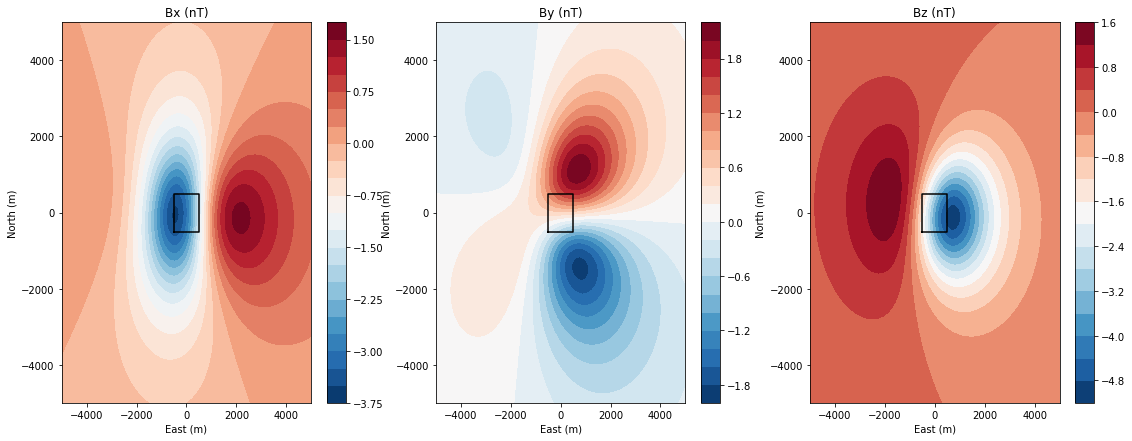

In [14]:
# Ploting all results 
plt.close('all')
plt.figure(figsize=(19,7))
#******************************************************
plt.subplot(1,3,1)
plt.contourf(Y, X, bx, 20, cmap = plt.cm.RdBu_r)
plt.title('Bx (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.plot(xs,ys,'k-')
plt.colorbar()
#******************************************************
plt.subplot(1,3,2)
plt.contourf(Y, X, by, 20, cmap = plt.cm.RdBu_r)
plt.title('By (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.plot(xs,ys,'k-')
plt.colorbar()
#******************************************************
plt.subplot(1,3,3)
plt.contourf(Y, X, bz, 20, cmap = plt.cm.RdBu_r)
plt.title('Bz (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.plot(xs,ys,'k-')
plt.colorbar()

plt.show()

In [15]:
# Etapa 4: Calculo do Campo total:
CT =  numpy.sqrt((F*Fx + bx)**2 + (F*Fy + by)**2 + (F*Fz + bz)**2)
# Anomalia de Campo Total:
ACT = CT - F

#----------------------------------------------------------------- 
#t= len(ACT)
#mi = 0.0
#sigma = 4.5

#ACT = noise.noise_gaussiana(t, mi, sigma, ACT)

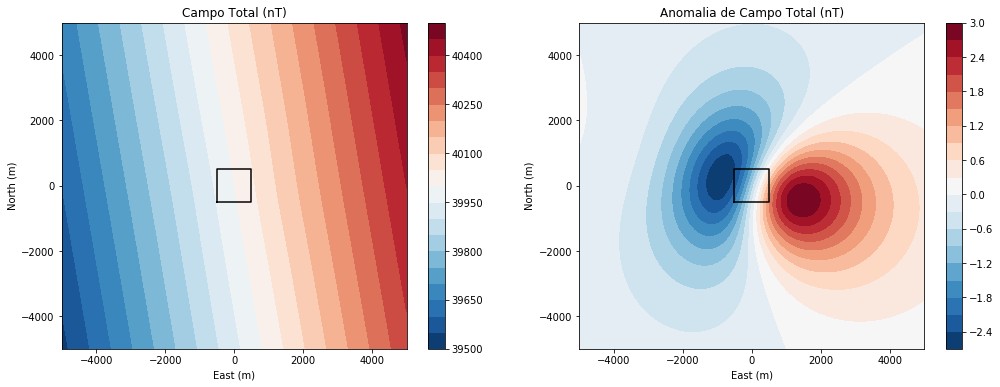

In [16]:
# graficos
plt.close('all')
plt.figure(figsize=(17,6))
#******************************************************
plt.subplot(1,2,1)
plt.contourf(Y, X, CT, 20, cmap = plt.cm.RdBu_r)
plt.title('Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.plot(xs,ys,'k-')
plt.colorbar()
#******************************************************
plt.subplot(1,2,2)
plt.contourf(Y, X, ACT, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.plot(xs,ys,'k-')
plt.colorbar()
#******************************************************
#plt.savefig('teste_100_40000_D10.png', format='png')
plt.show()

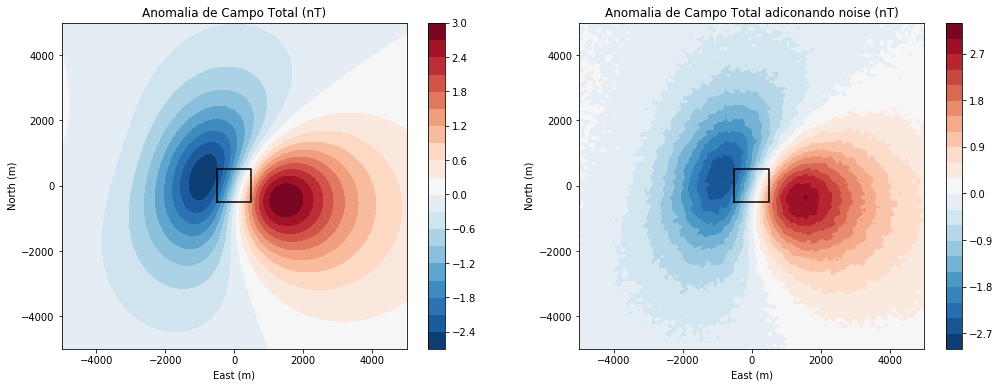

In [17]:
t= len(ACT)
mi = 0.0
sigma = 0.05

#ACTn = noise.noise_gaussiana(t, mi, sigma, ACT)
ACTn = auxiliars.noise_normal_dist(ACT, mi, sigma)


# graficos
plt.close('all')
plt.figure(figsize=(17,6))
#******************************************************
plt.subplot(1,2,1)
plt.contourf(Y, X, ACT, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.plot(xs,ys,'k-')
plt.colorbar()
#******************************************************
plt.subplot(1,2,2)
plt.contourf(Y, X, ACTn, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total adiconando noise (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.plot(xs,ys,'k-')
plt.colorbar()
#******************************************************
#plt.savefig('teste_100_40000_D10.png', format='png')
plt.show()

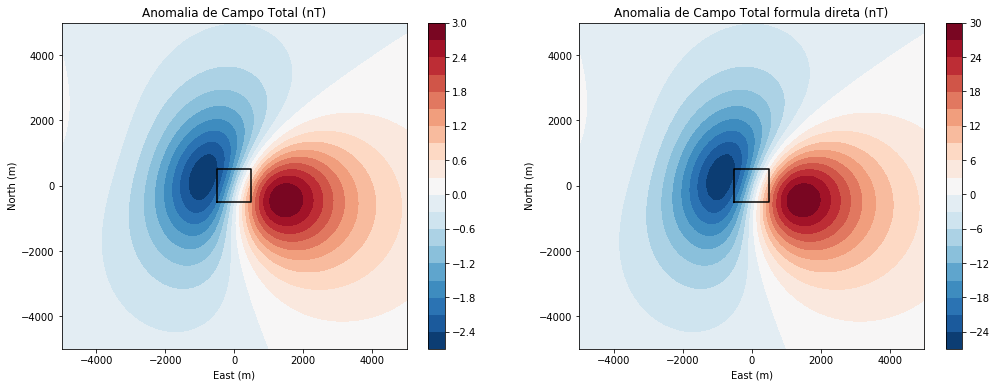

In [18]:
azim = 0.0

tfa = prism.prism_tf(Y, X, z, fonte_crustal_mag, inc,dec, I, D, azim)

# graficos
plt.close('all')
plt.figure(figsize=(17,6))
#******************************************************
plt.subplot(1,2,1)
plt.contourf(Y, X, ACT, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.plot(xs,ys,'k-')
plt.colorbar()
#******************************************************
plt.subplot(1,2,2)
plt.contourf(Y, X, tfa, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total formula direta (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.plot(xs,ys,'k-')
plt.colorbar()
#******************************************************
#plt.savefig('teste_100_40000_D10.png', format='png')
plt.show()

# <center> ----- Fim --------

# Graficos 3D:

In [19]:
# Pacotes especificos paara graficos 3D:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

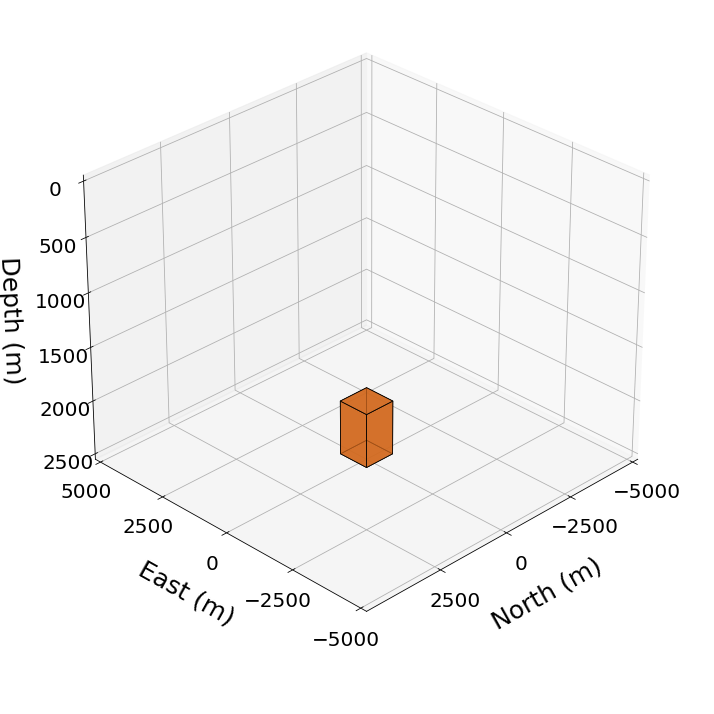

In [20]:
# Plot the main 3D source
figure = plt.figure(figsize=(10,10))

ax = figure.gca(projection = '3d')
#ax.set_title('Vertical dike model', size = 18)

x1, x2, y1, y2, z1, z2 = fonte_crustal_mag[:6]
v = numpy.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
vert =  [[v[0],v[1],v[2],v[3]], 
         [v[0],v[1],v[5],v[4]], 
         [v[1],v[2],v[6],v[5]],
         [v[2],v[3],v[7],v[6]], 
         [v[3],v[0],v[4],v[7]], 
         [v[4],v[5],v[6],v[7]]]

fig01 = Poly3DCollection(vert, alpha = 0.75, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 30)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(0., z2)
ax.set_xticks(numpy.arange(x.min(), x.max(), 2500))
ax.set_yticks(numpy.linspace(y.min(), y.max(), 5))
ax.set_zticks(numpy.linspace(0., z2, 6))
ax.tick_params(labelsize = 20, pad = 10)

# Visualization angle
ax.view_init(210, 135)

plt.tight_layout(True)
#plt.savefig('figs/dikemodel-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig('figs/dikemodel-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
plt.show()

In [21]:
# FIM